<a href="https://colab.research.google.com/github/linson13/MY-PROJECTS/blob/Machine-Learning-And-Artificial-Intelligence-Algorithms/Neural_Network_on_Mobile_Prices_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2554 - loss: 1.5467 - val_accuracy: 0.2625 - val_loss: 1.3863
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2832 - loss: 1.4526 - val_accuracy: 0.3225 - val_loss: 1.3815
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2680 - loss: 1.4212 - val_accuracy: 0.3575 - val_loss: 1.3813
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2281 - loss: 1.4196 - val_accuracy: 0.3575 - val_loss: 1.3818
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2492 - loss: 1.4131 - val_accuracy: 0.3750 - val_loss: 1.3814
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2670 - loss: 1.3909 - val_accuracy: 0.3525 - val_loss: 1.3810
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2584 - loss: 1.3900 - val_accuracy: 0.3950 - val_loss: 1.3795
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2533 - loss: 1.3910 - val_accuracy: 0.3650 - 

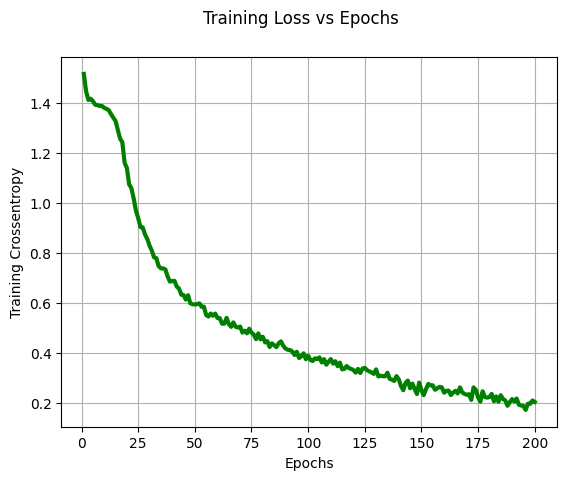

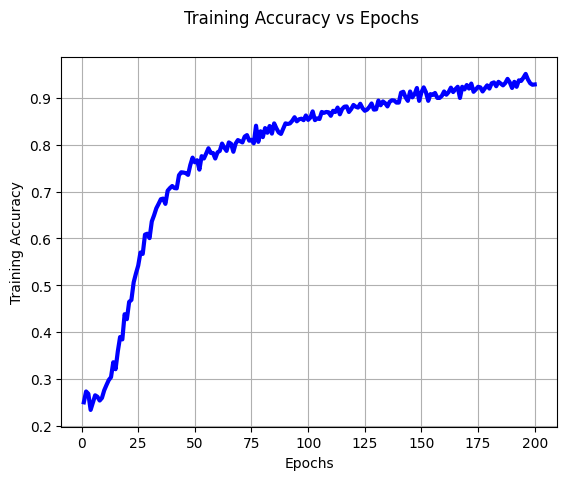

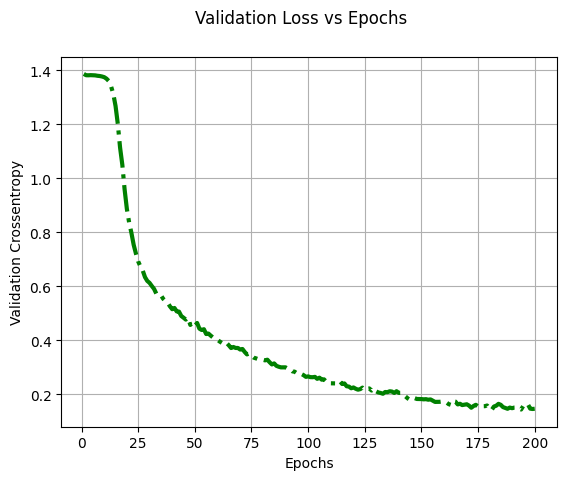

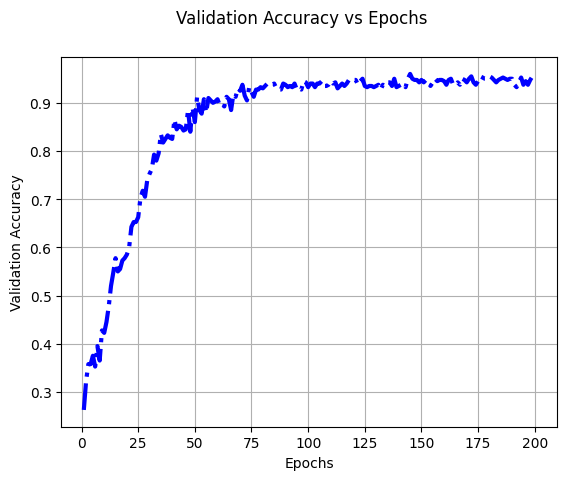

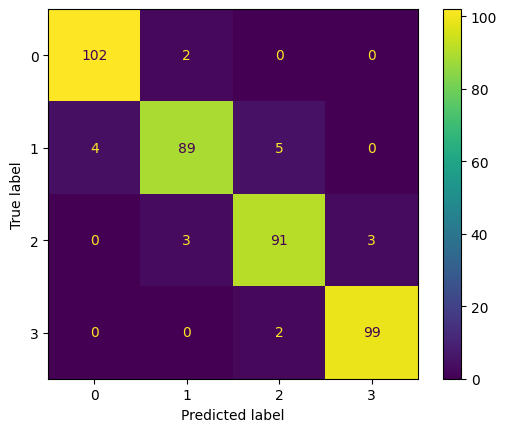

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/IITK fiiles/mobile_prices.csv")




X = df.iloc[:,:20]
y = df.iloc[:,20:21]


ss = StandardScaler()
X = ss.fit_transform(X)


Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=11)


oh = OneHotEncoder()
ytrain = oh.fit_transform(ytrain).toarray()


model = Sequential()
model.add(Dense(64,input_shape=(20,),activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4,activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


ytestoh = oh.fit_transform(ytest).toarray()
history = model.fit(Xtrain, ytrain, epochs=200, batch_size=100,validation_data=(Xtest,ytestoh))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)


score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')


plt.figure(1);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()


plt.figure(2);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()


plt.figure(3);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()


plt.figure(4);
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()
